# CIFAR 10 Classifier
## Step 1 Loading and Normalizing

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
    ]
)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=True, num_workers=2)


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog',
          'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

<Figure size 640x480 with 1 Axes>

  dog   car  ship  deer


In [3]:
# Defining a CNN

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # conv layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        
        # fc layers
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # Max pooling over a 2x2 window
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
print(net)     
        

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## Step 3 Defining a Loss FUnction and Optimizer

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Step 4 Training the Network

In [6]:
for epoch in range(10):
    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data # get inputs
        optimizer.zero_grad() # zero my gradients
        
        # fwd + bwd + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d %5d] loss: %.3f' %(epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
            

print('Finished Training')

[1  2000] loss: 2.192
[1  4000] loss: 1.845
[1  6000] loss: 1.684
[1  8000] loss: 1.592
[1 10000] loss: 1.555
[1 12000] loss: 1.490
[2  2000] loss: 1.421
[2  4000] loss: 1.414
[2  6000] loss: 1.417
[2  8000] loss: 1.387
[2 10000] loss: 1.347
[2 12000] loss: 1.316
[3  2000] loss: 1.256
[3  4000] loss: 1.269
[3  6000] loss: 1.272
[3  8000] loss: 1.257
[3 10000] loss: 1.228
[3 12000] loss: 1.210
[4  2000] loss: 1.152
[4  4000] loss: 1.154
[4  6000] loss: 1.159
[4  8000] loss: 1.162
[4 10000] loss: 1.167
[4 12000] loss: 1.151
[5  2000] loss: 1.044
[5  4000] loss: 1.093
[5  6000] loss: 1.083
[5  8000] loss: 1.119
[5 10000] loss: 1.088
[5 12000] loss: 1.103
[6  2000] loss: 1.016
[6  4000] loss: 1.023
[6  6000] loss: 1.044
[6  8000] loss: 1.053
[6 10000] loss: 1.032
[6 12000] loss: 1.045
[7  2000] loss: 0.967
[7  4000] loss: 0.967
[7  6000] loss: 1.002
[7  8000] loss: 0.980
[7 10000] loss: 1.003
[7 12000] loss: 0.994
[8  2000] loss: 0.936
[8  4000] loss: 0.934
[8  6000] loss: 0.964
[8  8000] 

## Step 5 Test Data

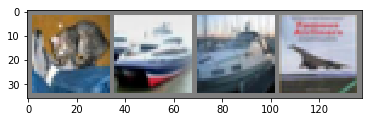

GroundTruth:    cat  ship  ship plane


In [7]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
outputs = net(images)

In [9]:
outputs

tensor([[-0.0199, -2.1459, -0.3764,  4.0414, -2.3375,  1.4739, -0.9142, -2.2412,
          2.6119, -0.0474],
        [ 4.9661,  5.8564, -1.6477, -3.8395, -3.3678, -4.5382, -7.5820, -1.0867,
          5.6325,  7.4155],
        [ 2.4960,  2.8491, -0.2704, -1.9701, -1.7630, -2.2241, -3.3054, -1.9454,
          3.0796,  3.6219],
        [ 4.3655,  1.9401,  0.0312, -1.5134, -0.4145, -3.9290, -2.8106, -2.3471,
          3.7543,  1.2085]], grad_fn=<AddmmBackward>)

In [10]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat truck truck plane


In [11]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %


In [12]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 61 %
Accuracy of   car : 65 %
Accuracy of  bird : 42 %
Accuracy of   cat : 36 %
Accuracy of  deer : 52 %
Accuracy of   dog : 55 %
Accuracy of  frog : 58 %
Accuracy of horse : 70 %
Accuracy of  ship : 72 %
Accuracy of truck : 79 %


## Step 6 Training on GPU

In [7]:
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#print(device)
#net.to(device)
#inputs, labels = inputs.to(device), labels.to(device)

## Save Model


In [15]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in net.state_dict():
    print(param_tensor, "\t", net.state_dict()[param_tensor].size())

print("\n")
# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([6, 3, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([10, 84])
fc3.bias 	 torch.Size([10])


Optimizer's state_dict:
state 	 {1702956939088: {'momentum_buffer': tensor([[[[ 0.2367,  0.0428, -0.1663, -0.3725, -0.3717],
          [ 0.4059,  0.2705,  0.0966, -0.1525, -0.1889],
          [ 0.5125,  0.4412,  0.3588,  0.0654,  0.0809],
          [ 0.4287,  0.4683,  0.4297,  0.1659,  0.2293],
          [ 0.3463,  0.3613,  0.3307,  0.1285,  0.1057]],

         [[ 0.1235, -0.0892, -0.3072, -0.4688, -0.4017],
          [ 0.2743,  0.1539, -0.0015, -0.2148, -0.2157],
          [ 0.3512,  0.2787,  0.2062, -0.0018,  0.0595],
          [ 0.2538,  0.2981,  0.2632,  0.1100,  0.2280],
          [ 0.2305,  0.2721,  0.2333,  0.1159,  0.1088]],

      

### Save for inference

In [17]:
torch.save(net.state_dict(), "./models/cifar10-79b-36w-inference.pth")

### Load model for inference

can be anywhere??

model = Net(nn.module)

model = load_state_dict(torch.load(PATH))

model.eval()

### Save Entire Model
needs to be loaded in the same directory with no changes to the network file.

basically stores weights and parameters and points to the right class file

In [20]:
torch.save(net, "./models/cifar10-79b-36w-fullmodel.pth")

C:\Anaconda3\lib\site-packages\torch\serialization.py:251: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


n.b. the above method seems to have some issues with saving models that aren't in .py files. so beware with jupyter notebooks.

https://discuss.pytorch.org/t/got-warning-couldnt-retrieve-source-code-for-container/7689